In [1]:
%matplotlib inline

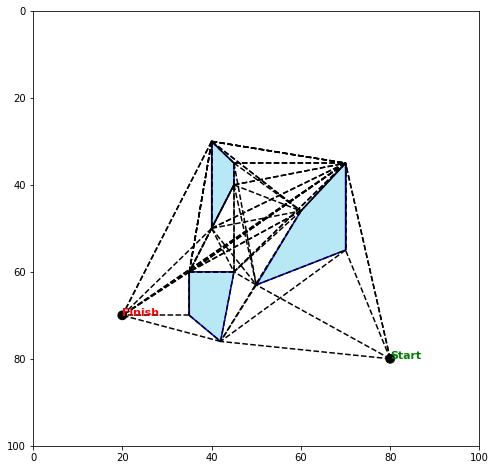

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from Global import Global
from shapely import geometry as geo
import matplotlib.pyplot as plt

import numpy as np

In [3]:
def plotSegments(segments):
    #plotting parameters
    fsz = 8 # size of the plotted figure
    polyColor = "blue" # color of the map polygons
    startColor = "green" # color of the starting point
    finishColor = "red" # color the the finish point
    debugLineColor = "black"

    #defining a function to plot a polygon :
    #setting map limits
    plt.xlim(0,10)
    plt.ylim(0,10)

    fig = plt.gcf()
    ax = fig.gca()

    ## we need origin to right so we flip the plot
    ax.invert_yaxis()
    fig.set_size_inches((fsz,fsz))

    #Plotting the debug lines
    for line in segments:
        plt.plot([ line[0][0],line[1][0] ],[ line[0][1],line[1][1] ],color="blue")

    #displaying the map
    plt.show()

## Testing environnement for the intersect function

In [11]:
def testIntersect(ax=1.,ay=1.,bx=3.,by=1.):
    seg1 = [(2.,2.),(3.,3.)]
    seg2 = [(ax,ay),(bx,by)]
    print(intersect(seg1,seg2))
    plotSegments([seg1,seg2])
    return intersect(seg1,seg2)

In [12]:
def intersect(seg1,seg2):
    def intersectHelper(s1,s2):
        def val(p,q,r):
            return (q[1]-p[1])*(r[0]-q[0])-(q[0]-p[0])*(r[1]-q[1])
        v = val(s1[0],s1[1],s2[0]) * val(s1[0],s1[1],s2[1])
        return v < 0
        
    return intersectHelper(seg1,seg2) and intersectHelper(seg2,seg1)
    

In [15]:
w = interactive(testIntersect,ax=(0.,10.),ay=(0.,10.),bx=(0.,10.),by=(0.,10.))
display(w)

interactive(children=(FloatSlider(value=1.0, description='ax', max=10.0), FloatSlider(value=1.0, description='…

## Interactive testing environnement for the global navigation

In [7]:
def TestMap():
    polyA = geo.Polygon([(40.,30.),
                         (40.,50.),
                         (45.,40.),
                         (45.,35.)])

    polyB = geo.Polygon([(70.,35.),
                         (60.,46.),
                         (50.,63.),
                         (70.,55.)])

    polyC = geo.Polygon([(35.,60.),
                         (35.,70.),
                         (42.,76.),
                         (45.,60.)])

    return [polyA,polyB,polyC]

In [8]:
def displayGlobal(sx=80.,sy=20.,fx=20.,fy=70.):
    start = (sx,sy)
    finish = (fx,fy)

    test = Global(TestMap(),start,finish)

    test.plot(test.paths())

In [9]:
w = interactive(displayGlobal,sx=(0.,100.),sy=(0.,100.),fx=(0.,100.),fy=(0.,100.))
display(w)

interactive(children=(FloatSlider(value=80.0, description='sx'), FloatSlider(value=20.0, description='sy'), Fl…